In [1]:
!nvidia-smi

Mon Nov 18 16:25:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 93.2MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 93.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 58.9ms
Speed: 12.3ms preprocess, 58.9ms inference, 747.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


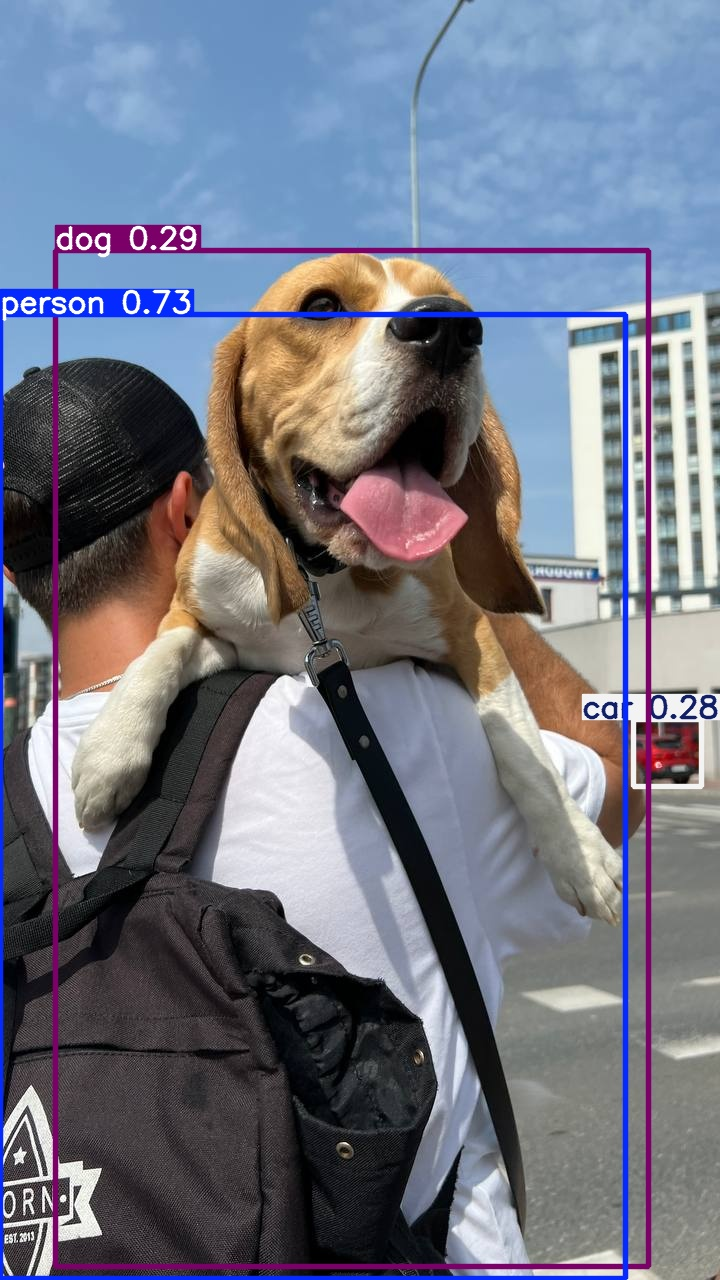

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("example").project("grocery-dataset")
version = project.version(5)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Grocery-Dataset-5 in yolov8:: 100%|██████████| 67850/67850 [00:15<00:00, 4441.10it/s]


In [8]:


%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 119MB/s] 
New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Grocery-Dataset-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

/content


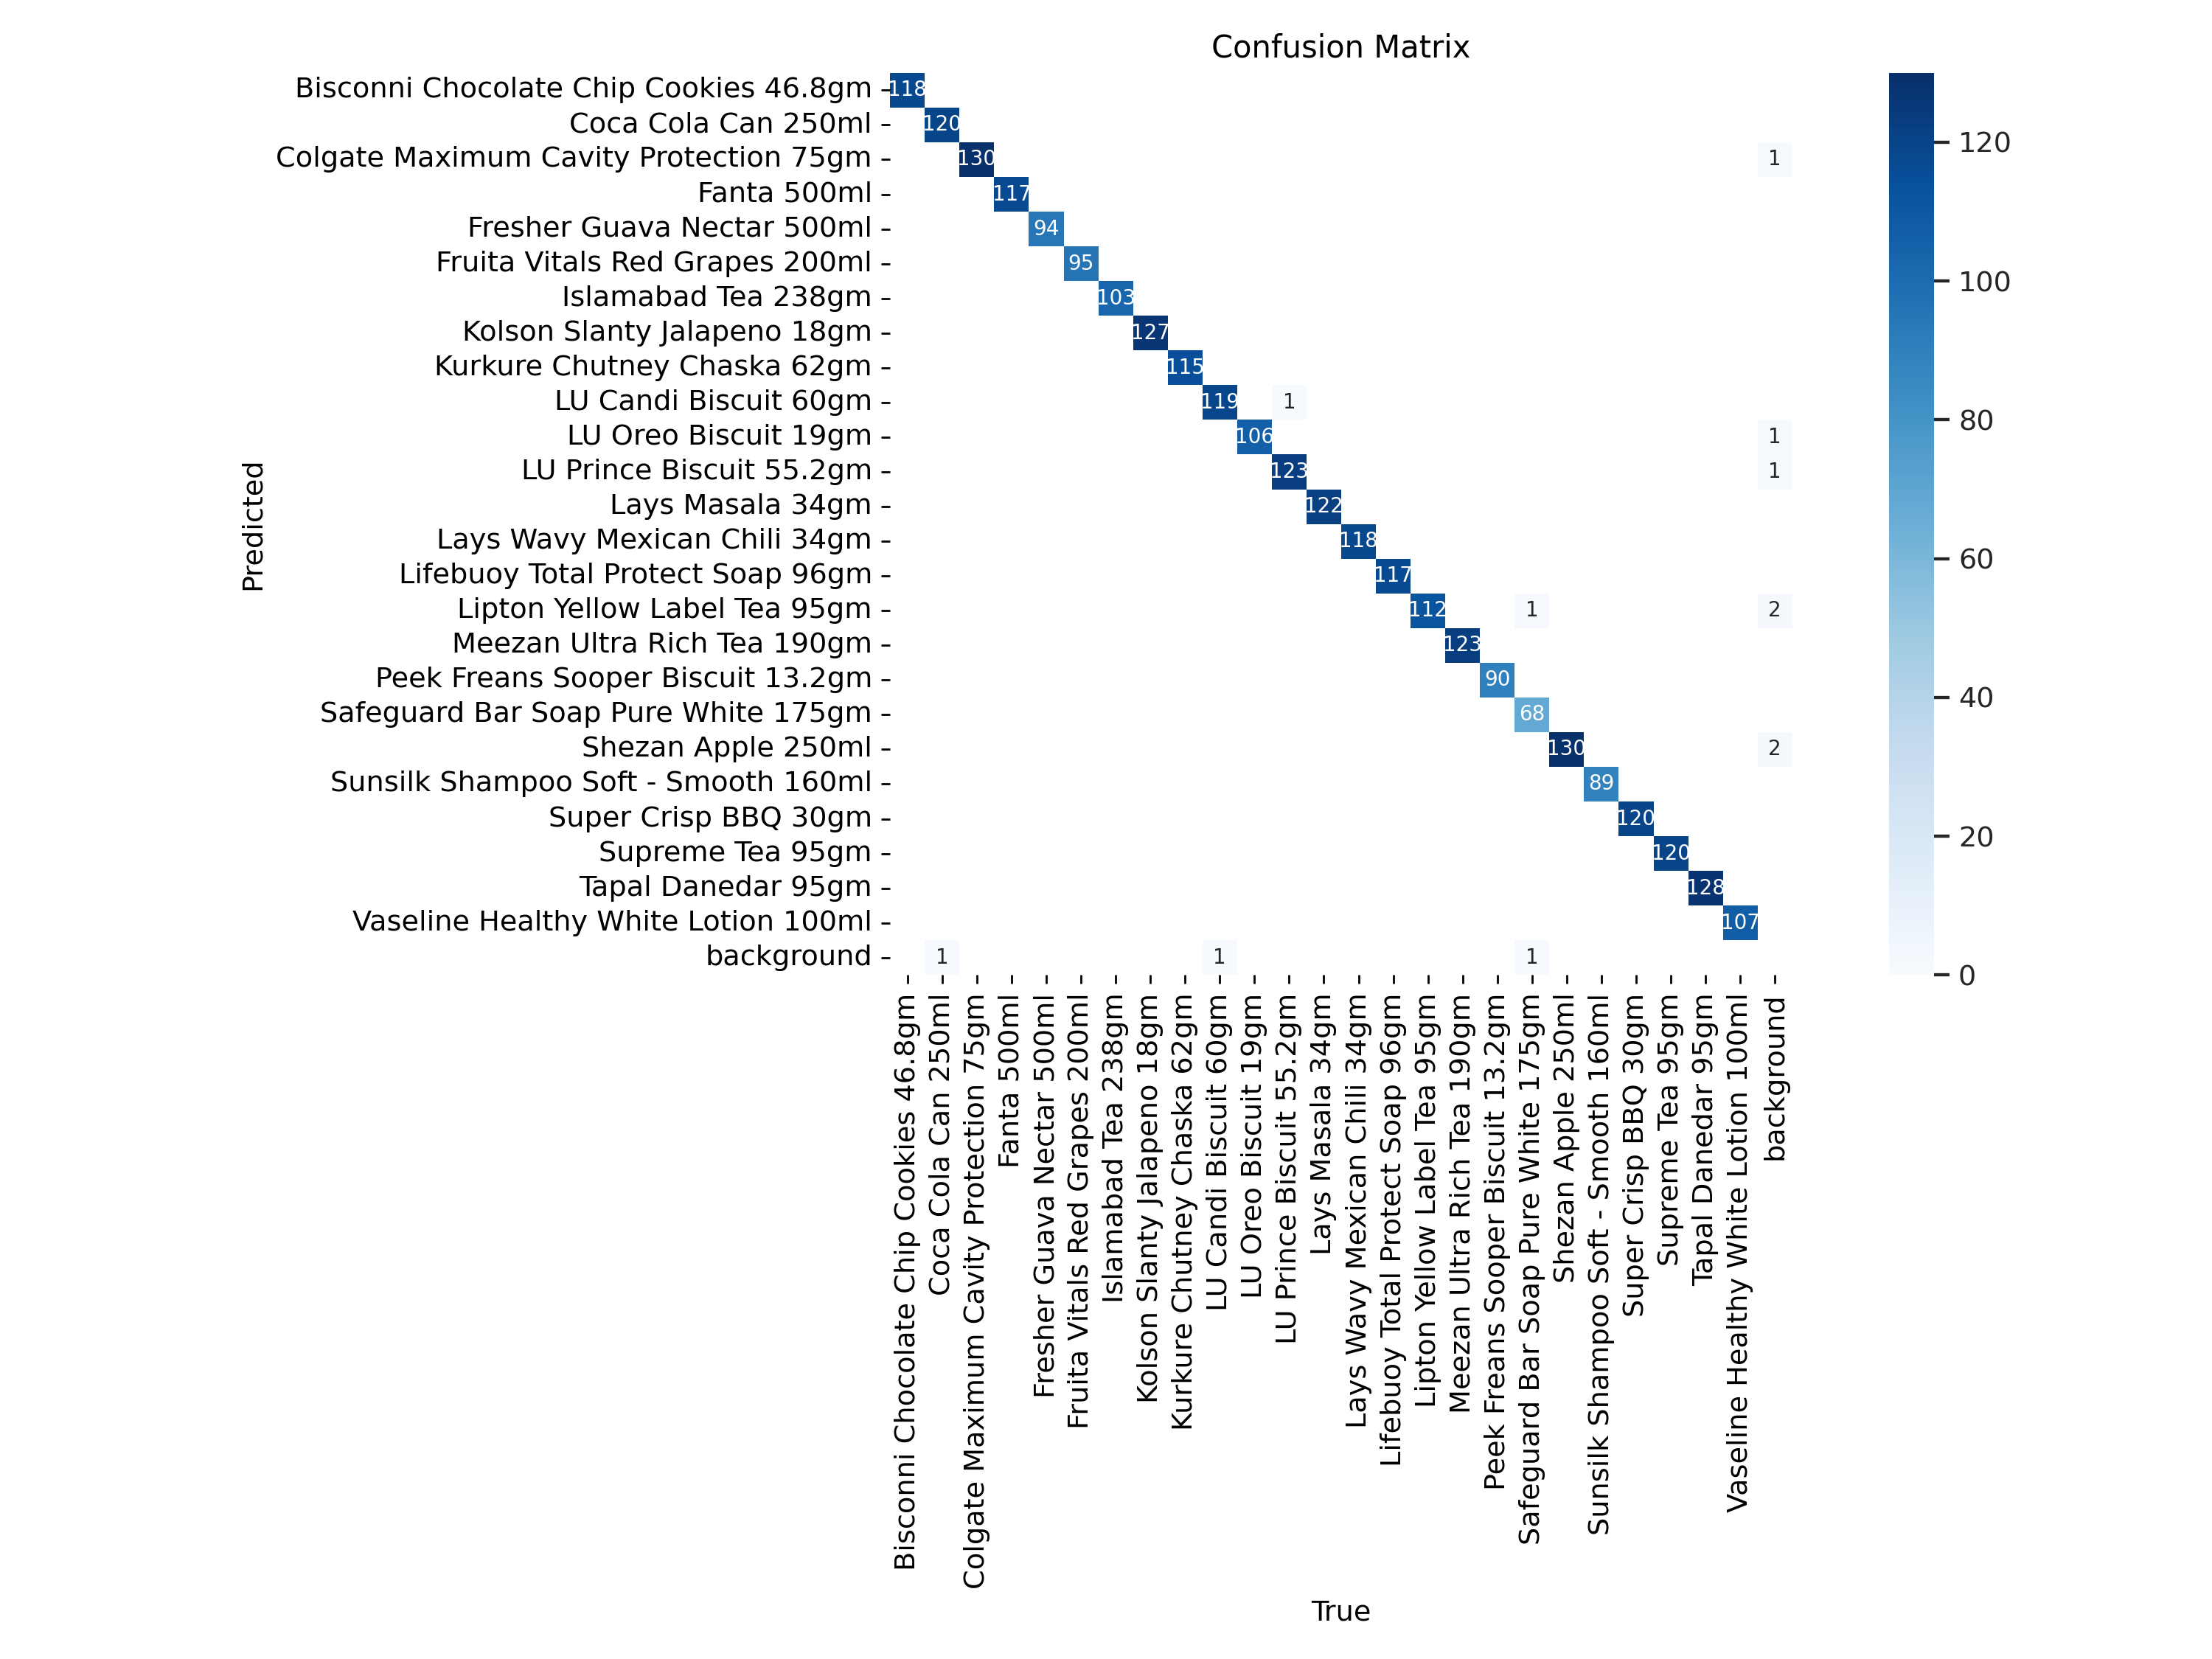

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


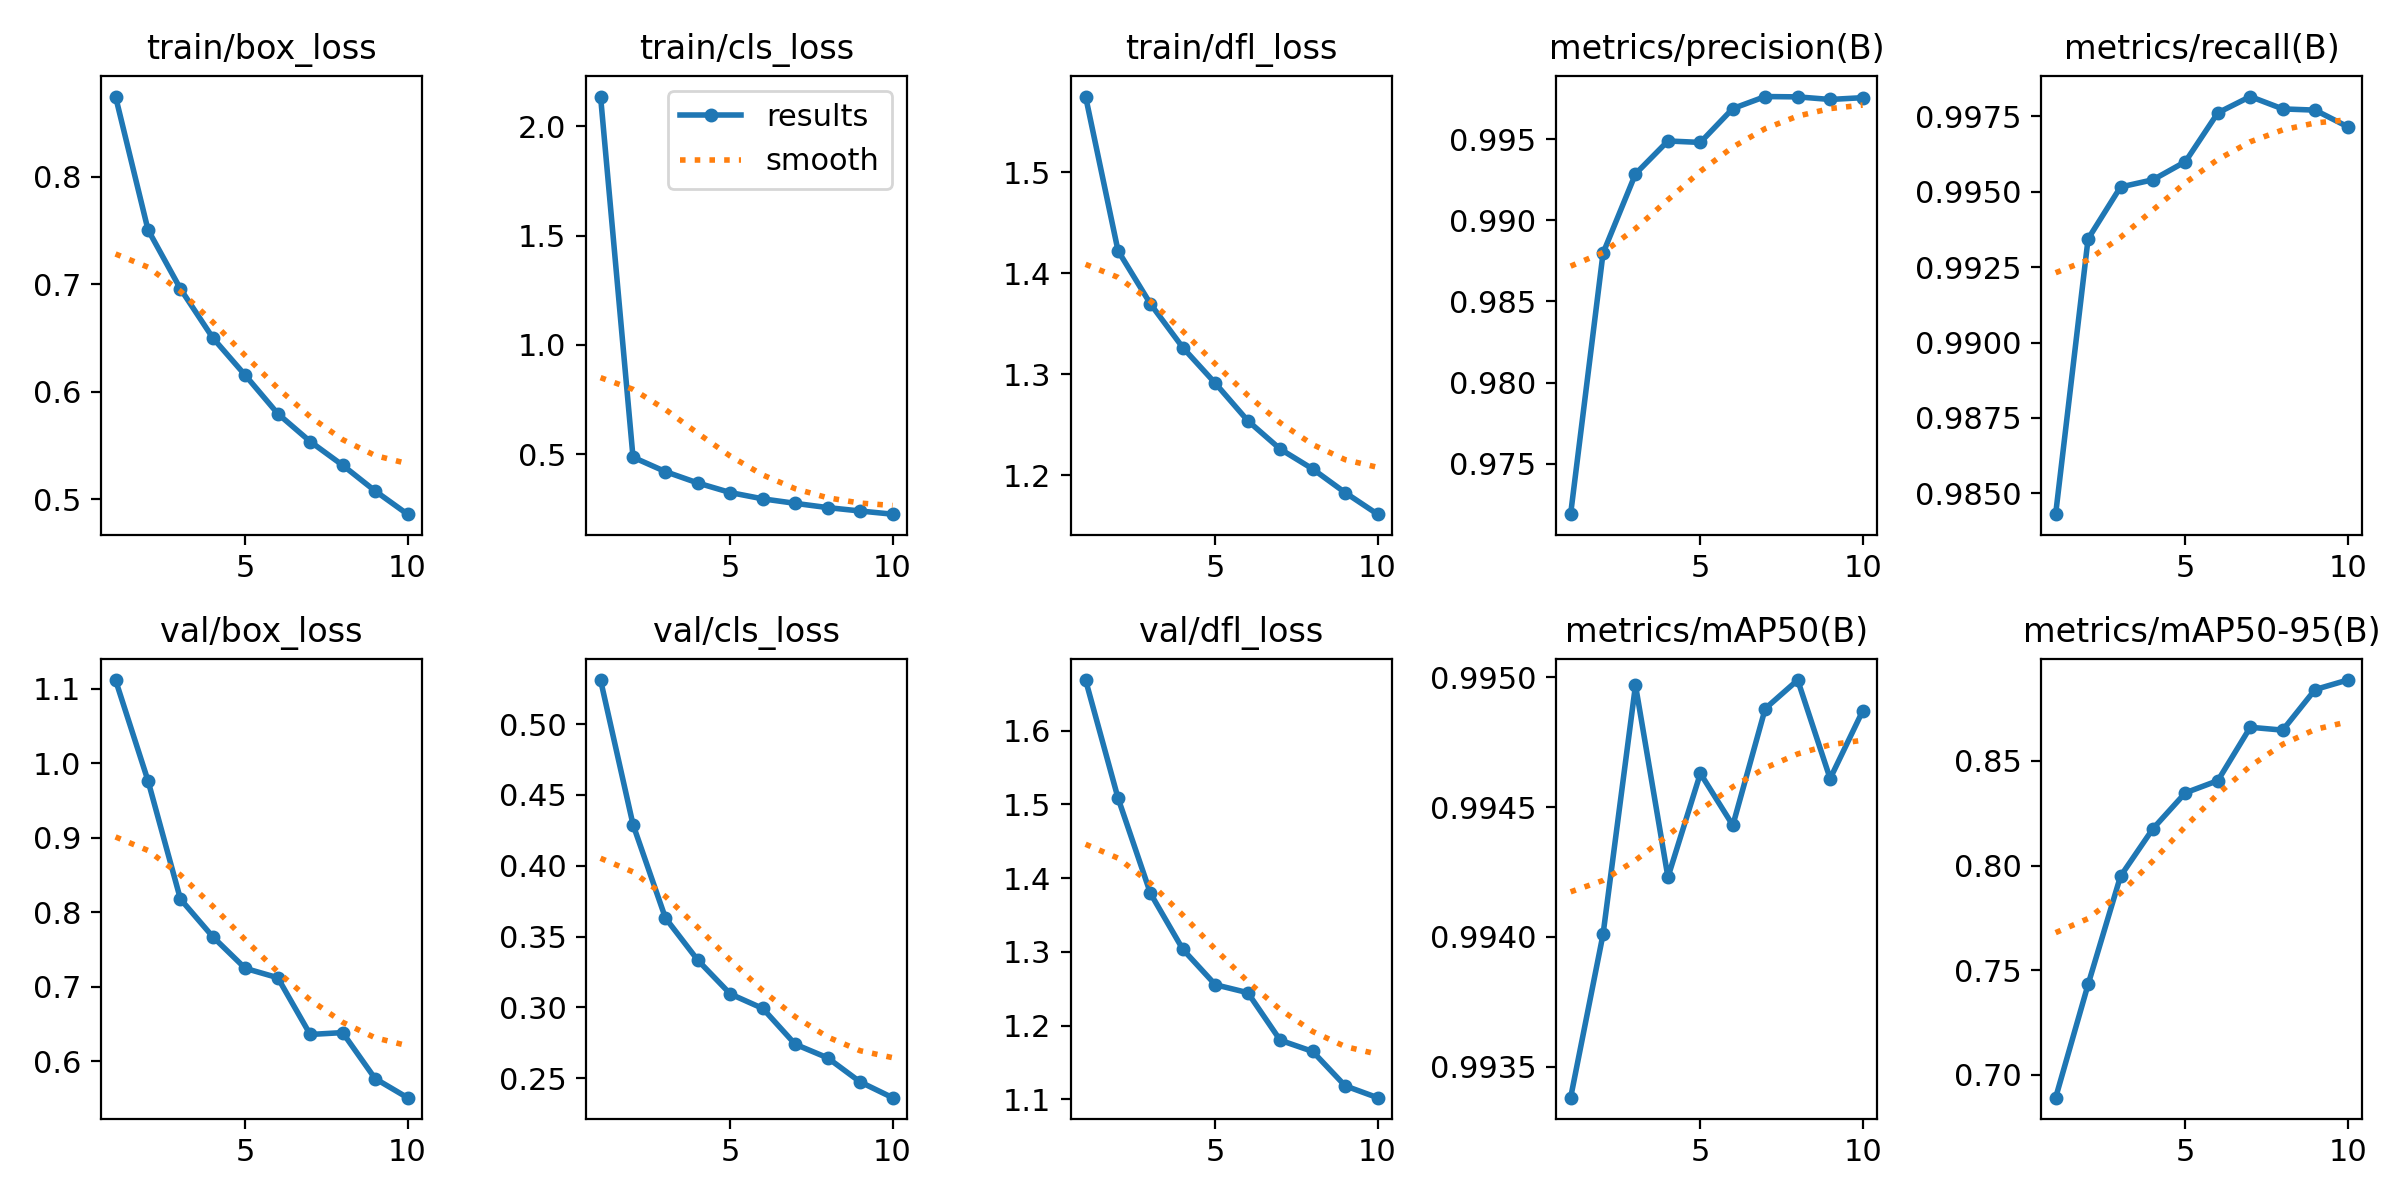

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


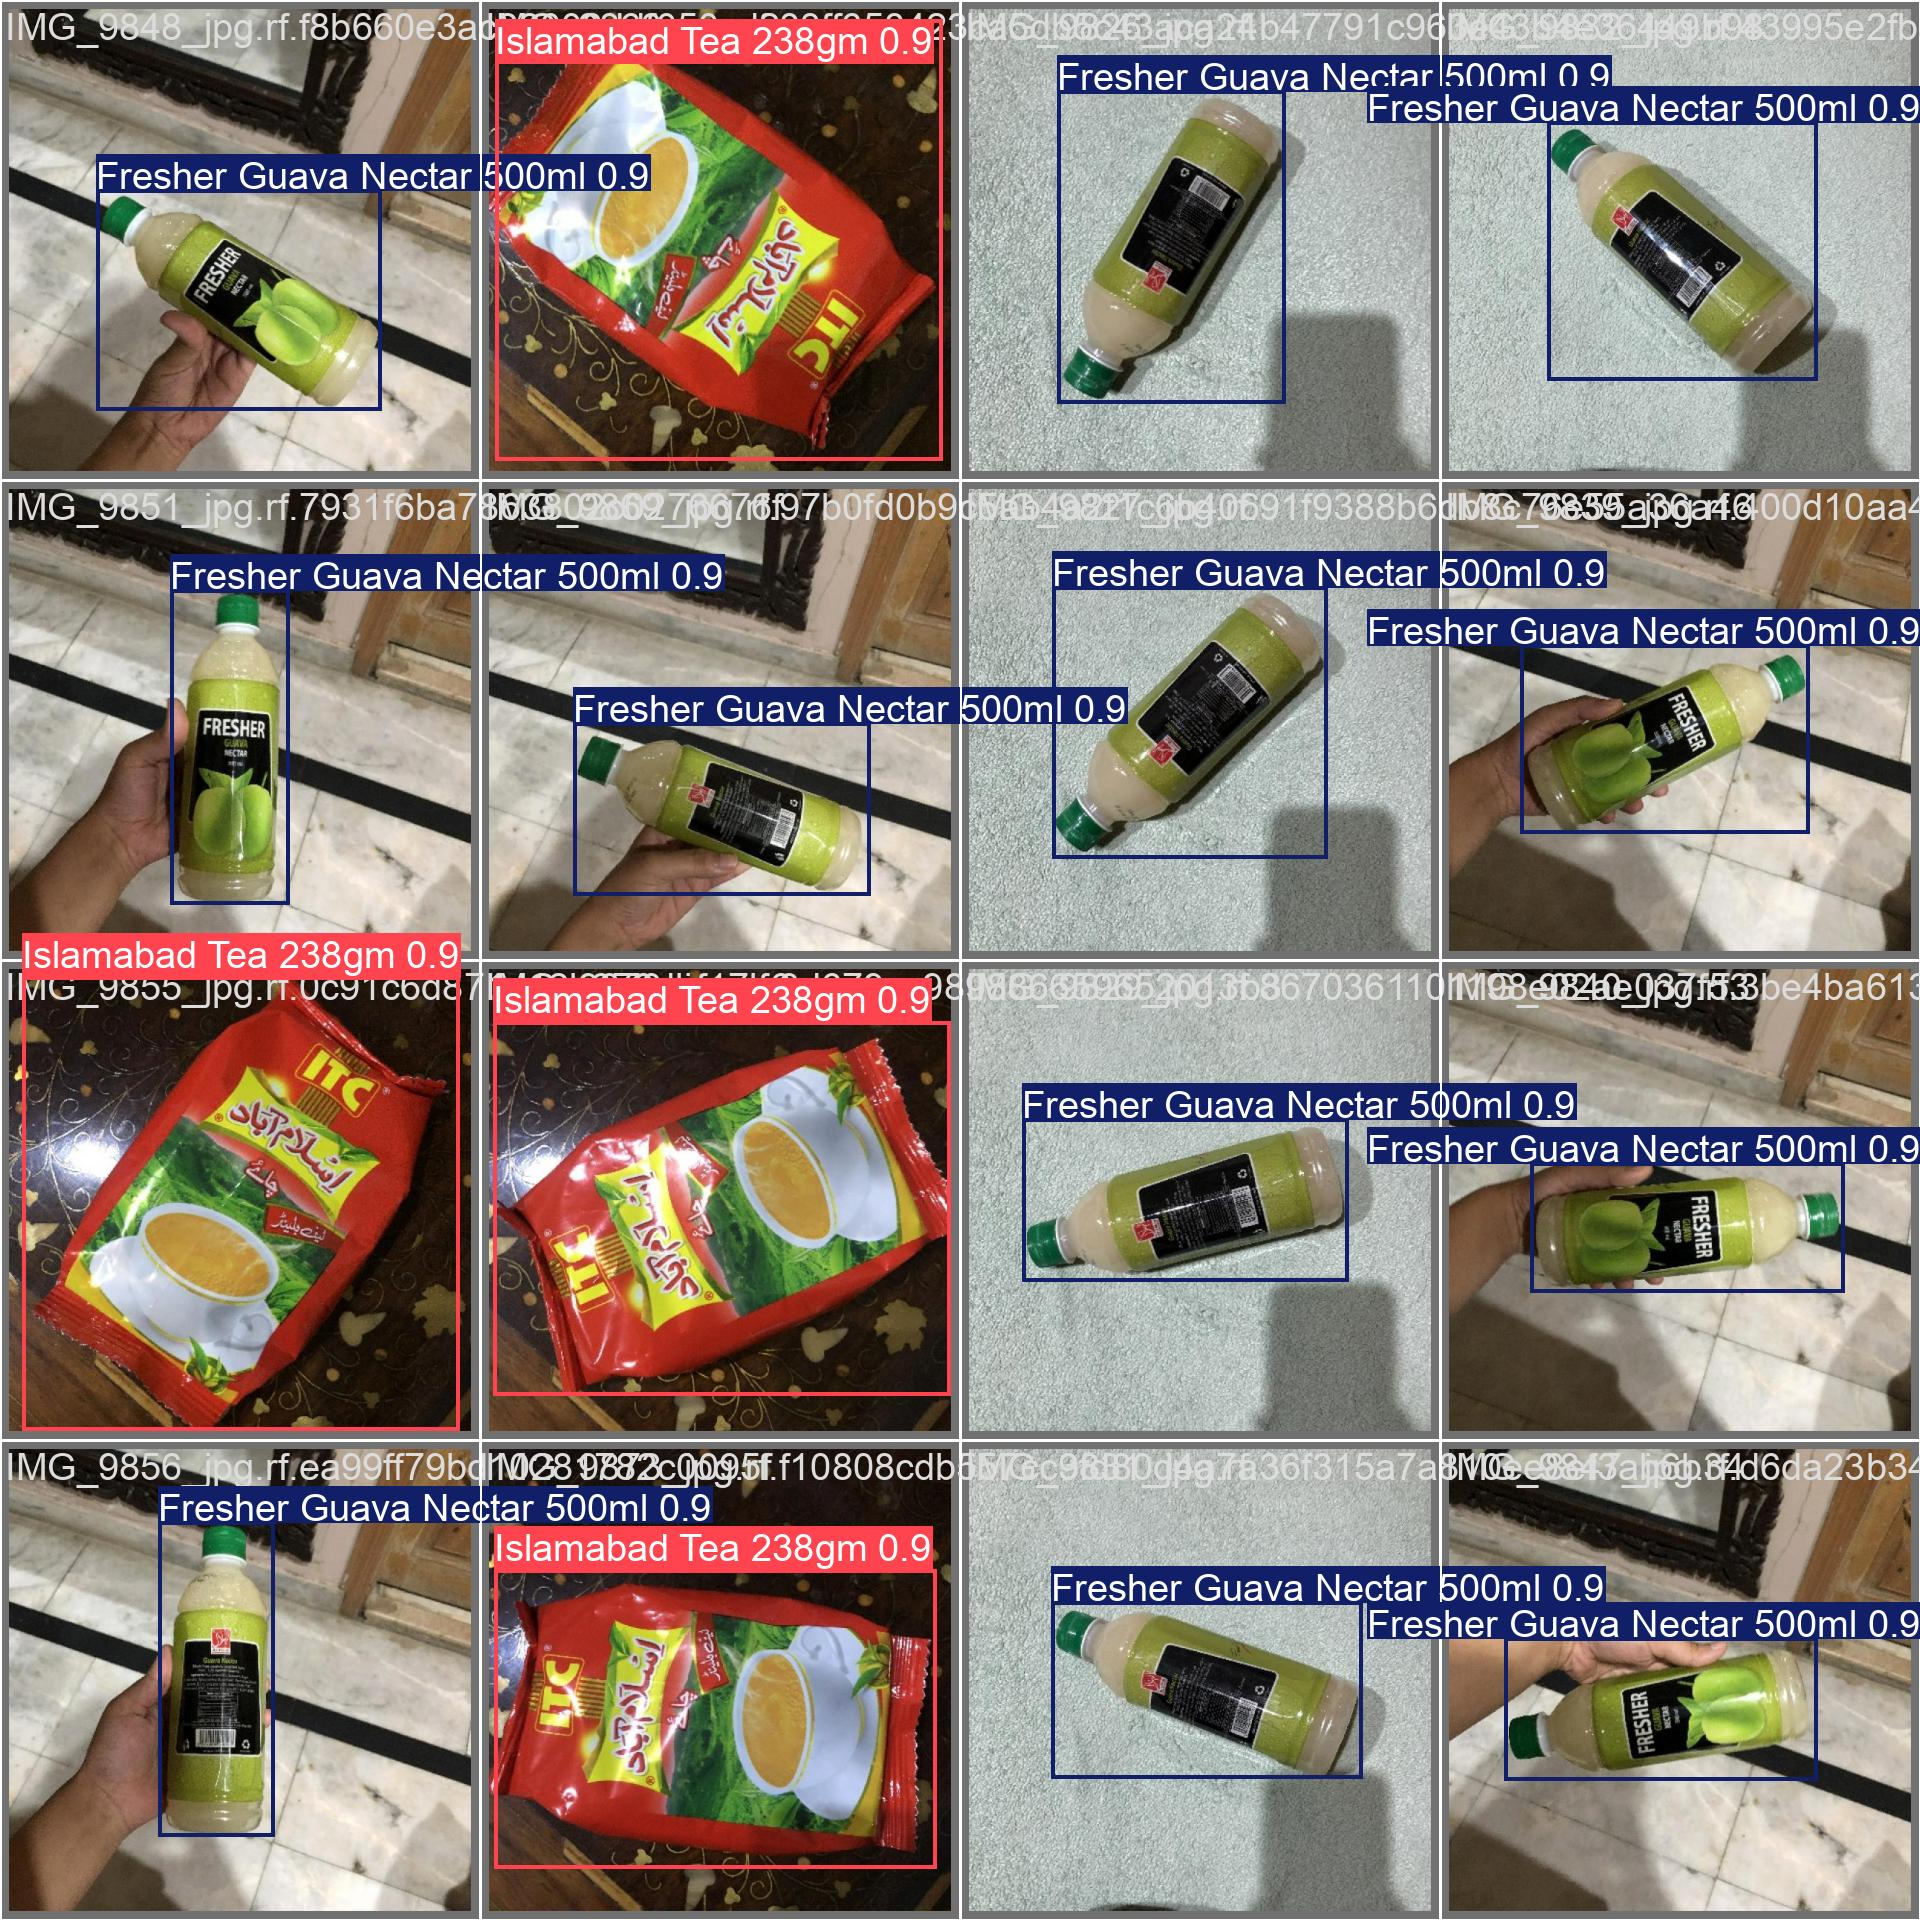

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,135,259 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Grocery-Dataset-5/valid/labels.cache... 2815 images, 0 backgrounds, 0 corrupt: 100% 2815/2815 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 176/176 [00:53<00:00,  3.28it/s]
                   all       2815       2816      0.998      0.997      0.995      0.889
Bisconni Chocolate Chip Cookies 46.8gm        118        118      0.999          1      0.995      0.905
   Coca Cola Can 250ml        120        121      0.999      0.992      0.995      0.876
Colgate Maximum Cavity Protection 75gm        130        130      0.996          1      0.995      0.878
           Fanta 500ml        117        117      0.999          1      0.995      0.914
Fresher Guava Nectar 500ml         94         94      0.998          1  

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,135,259 parameters, 0 gradients, 28.5 GFLOPs

image 1/1431 /content/datasets/Grocery-Dataset-5/test/images/IMG_0055_jpg.rf.0021c9caea160c670afd34dabb397a0e.jpg: 800x800 1 Fruita Vitals Red Grapes 200ml, 22.9ms
image 2/1431 /content/datasets/Grocery-Dataset-5/test/images/IMG_0068_jpg.rf.99856709f58457e9235cf2fb32a372a8.jpg: 800x800 1 Fruita Vitals Red Grapes 200ml, 22.9ms
image 3/1431 /content/datasets/Grocery-Dataset-5/test/images/IMG_0080_jpg.rf.a82d3a3e686d4d628fc396b2e3b30afb.jpg: 800x800 1 Fruita Vitals Red Grapes 200ml, 22.9ms
image 4/1431 /content/datasets/Grocery-Dataset-5/test/images/IMG_0081_jpg.rf.a1499647cfeabbfab74f6c5c710cb1ea.jpg: 800x800 1 Fruita Vitals Red Grapes 200ml, 22.9ms
image 5/1431 /content/datasets/Grocery-Dataset-5/test/images/IMG_0092_jpg.rf.e7f93ded0b8635f764e369e0c8b161a1.jpg: 800x800 1 Fruita Vitals Red Grapes 200ml, 22.9ms

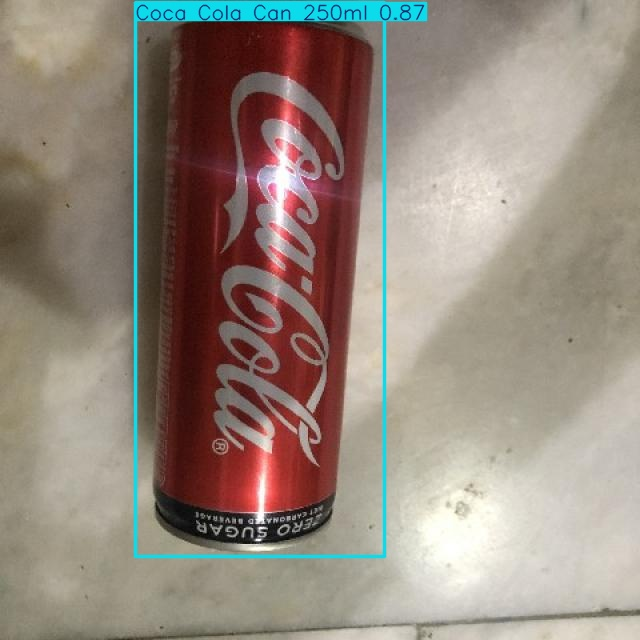

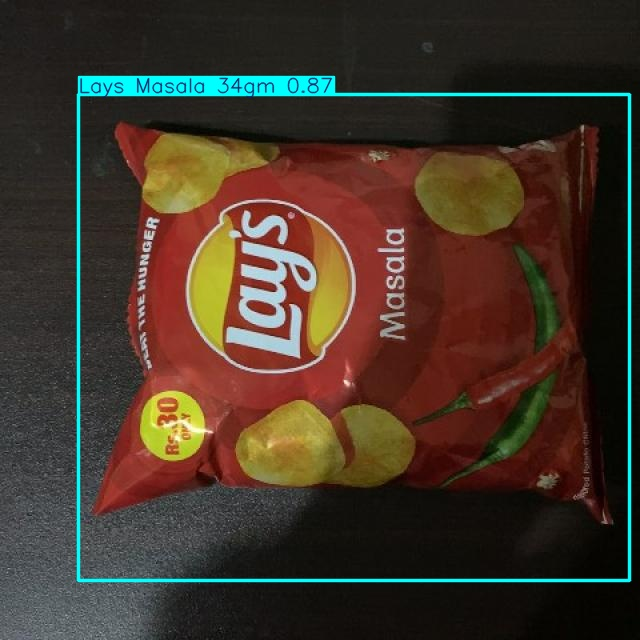

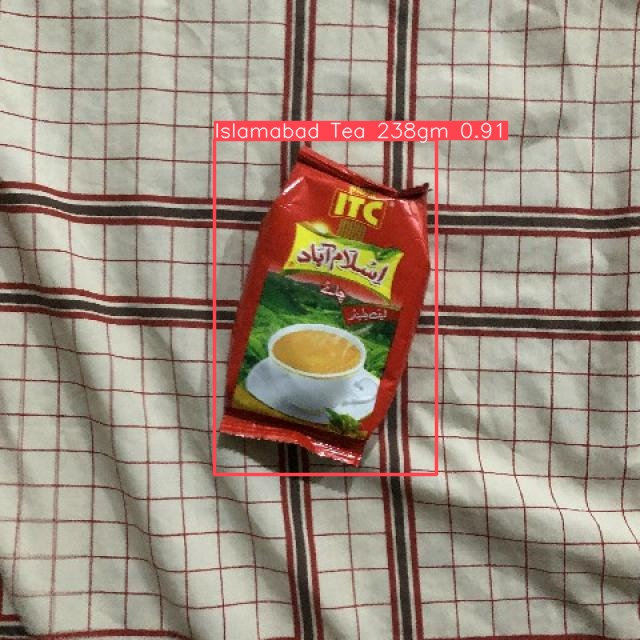

In [14]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [18]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 14%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 14%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/R_curve.png (deflated 15%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/PR_curve.png (deflated 28%)
  adding: content/runs/detect/val/P_curve.png (deflated 25%)
  adding: content/runs/detect/val/F1_curve.png (deflated 14%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: cont